# Logistic Regression

This notebook implements the custom logistic regression algorithm on the Breast Cancer Wisconsin dataset. Here, logistic regression is used to classify tumors into malignant or benign based on input data for various numerical features. The objective of this task is to validate the use of the custom logistic regression, and evaluate its performance for a multi-feature classification problem.

The following sections are included in this notebook:
1. **Library Imports**
- Importing the necessary modules, packages, and libraries
- Specifies dependencies and preferred versions
2. **Data Loading and Cleaning**
- Loads the Breast Cancer Wisconsin dataset with relevant features
- Drops outliers, duplicates, and missing data
- Creates arrays for the features and target variable
3. **Data Visualization**
- Visualizes the correlation between features using a heatmap
- Visualizes the distribution of two features with the target on a 2D color plot
4. **Logistic Regression Implementation (2 Features)**
- Implements the custom-built logistic regression algorithm with two input features  
- Visualizes the classification  
- Evaluates the results across multiple metrics  
5. **Logistic Regression Implementation (Changing Parameters)**
- Implements the custom-built logistic regression with various parameters (number of epochs and learning rate)
- Examines the effect on model performance
6. **Logistic Regression Implementation (Multiple Features)**
- Implements the custom-built logistic regression with more than two features to ensure functionality
- Evaluates the results across multiple metrics
7. **Comparison with Existing Models**
- Runs the scikit-learn version of logistic regression
- Compares the results with the custom-built class to verify the latter

*For a more comprehensive overview of the logistic regression algorithm, code structure, and metrics used, see the associated [README](README.md).*

### Library Imports
This section imports the packages and modules required to run logistic regression. The following dependencies (with recommended versions) are required:
- Python 3.9.6
- Numpy 1.26.4
- Pandas 2.3.3
- Matplotlib 3.9.4
- Seaborn 0.13.2
- Sklearn 1.6.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.supervised_learning.regression import *
from rice_ml.postprocess.classificationpost import *
import sklearn

### Data Loading and Cleaning
*Loading, preprocessing, and dividing data*

The data used in this notebook comes from Breast Cancer Wisconsin, a common dataset for evaluating classification algorithms. It has been selected for its number of features and clear relationships, and because it allows for several data cleaning steps that showcase the `rice_ml` preprocessing modules. The features of interest in this example are *target* (numeric encoding of a categorical value and the target variable for classification), as well as a range of numeric features relating to tumor characteristics.

The data is first loaded as a Pandas DataFrame. For classification, the *target* feature has been converted to discrete integer values, with 0 representing a malignant tumor and 1 representing a benign tumor.

In [3]:
# Loading the data
cancer_data = sklearn.datasets.load_breast_cancer(as_frame = True)
cancer_data = cancer_data.frame
display(cancer_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


To ensure that the dataset does not contain missing data, we apply a series of preprocessing steps using functions from the `preprocess` package, including dropping any rows with missing values or that are identified to be duplicates of another.

In [4]:
# Cleaning the dataset (dropping rows that are duplicates or contain missing data)
cancer_data_missing = missing_data(cancer_data, 'drop')
cancer_data_cleaned = duplicate_identify(cancer_data_missing, True)

We then split the dataset into the target variable and the other features. The target variable for classification in this dataset is "target", which indicates the presence (0) or absence (1) of breast cancer.

In [5]:
# Creating two arrays
cancer_features = cancer_data_cleaned[:, :-1]
cancer_status = cancer_data_cleaned[:, -1]
print(f"Array for features (first five entries, first five features): \n {cancer_features[0:5, 0:5]} \n \n \
Array for presence/absence of cancer (first five rows): \n {cancer_status[0:5]}")

Array for features (first five entries, first five features): 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]] 
 
 Array for presence/absence of cancer (first five rows): 
 [0. 0. 0. 0. 0.]


### Data Visualization
*Correlations and feature plotting*

Once the data has been appropriately cleaned, the relationships between variables can be visualized using a set of methods. We first visualize the correlations between features using a heatmap of a calculated correlation matrix, applied to the cleaned DataFrame that includes all possibly relevant features. Doing so allows for the identification of features that are correlated with the target, and may thus be appropriate for classification using logistic regression.

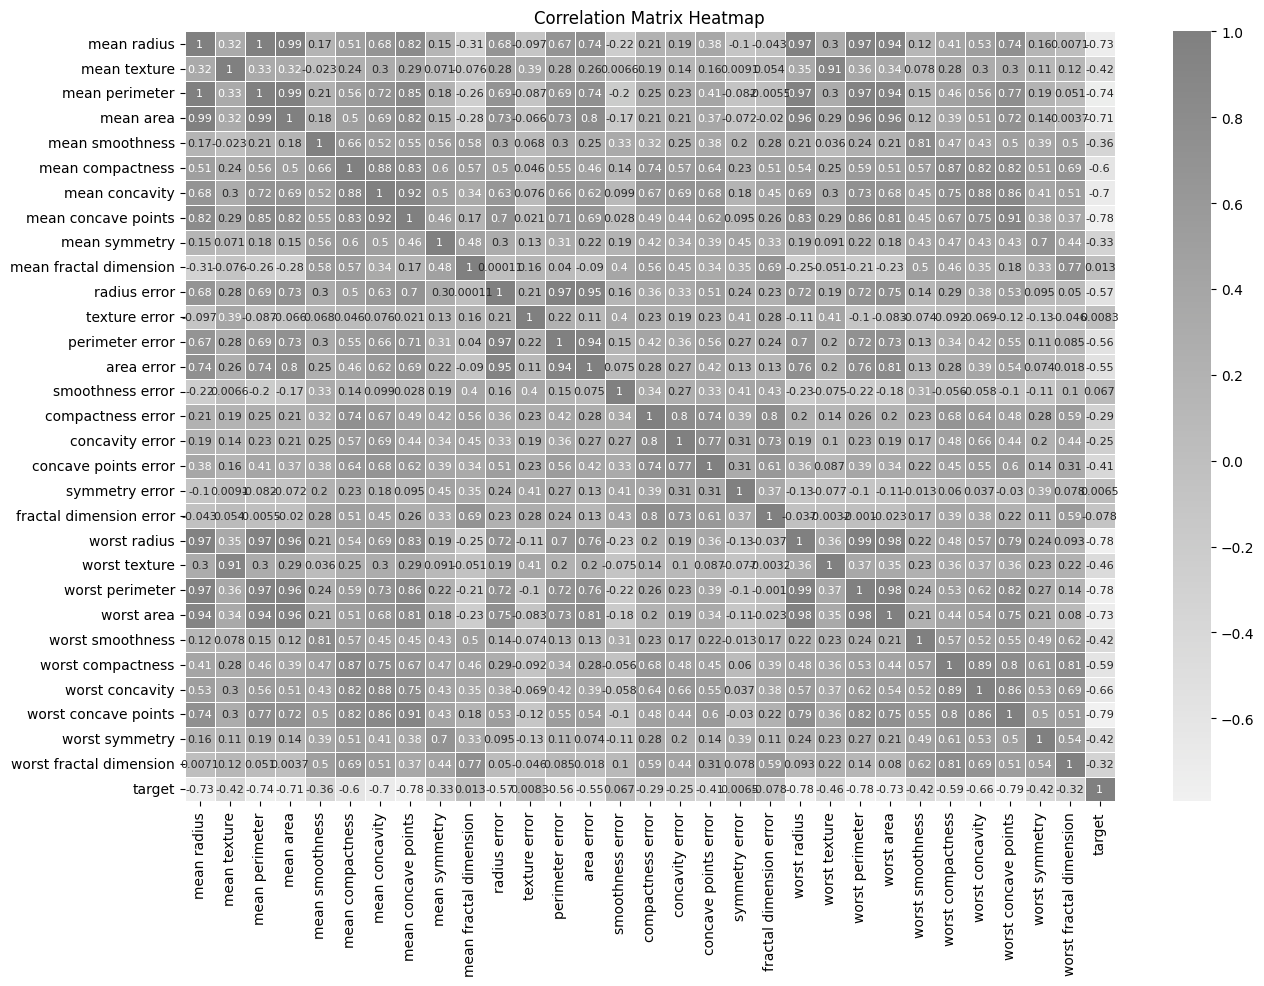

In [6]:
# Creating and plotting a correlation matrix with a heatmap
correlation_matrix = (pd.DataFrame(cancer_data_cleaned, columns = cancer_data.columns)).corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8}, cmap = sns.light_palette('gray', as_cmap=True), linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The target feature appears to be correlated with the *mean radius* (-0.73) and *mean concavity* (-0.7). Consequently, these features are appropriate for logistic regression, and we select them as the features to be used for cancer classification. To visualize the relationship between the three variables (*mean radius*, *mean concavity*, and *target*) and identify possible clusters prior to formal analysis, we can create a two-dimensional plot of mean concavity versus mean radius, with colors indicating tumor type.


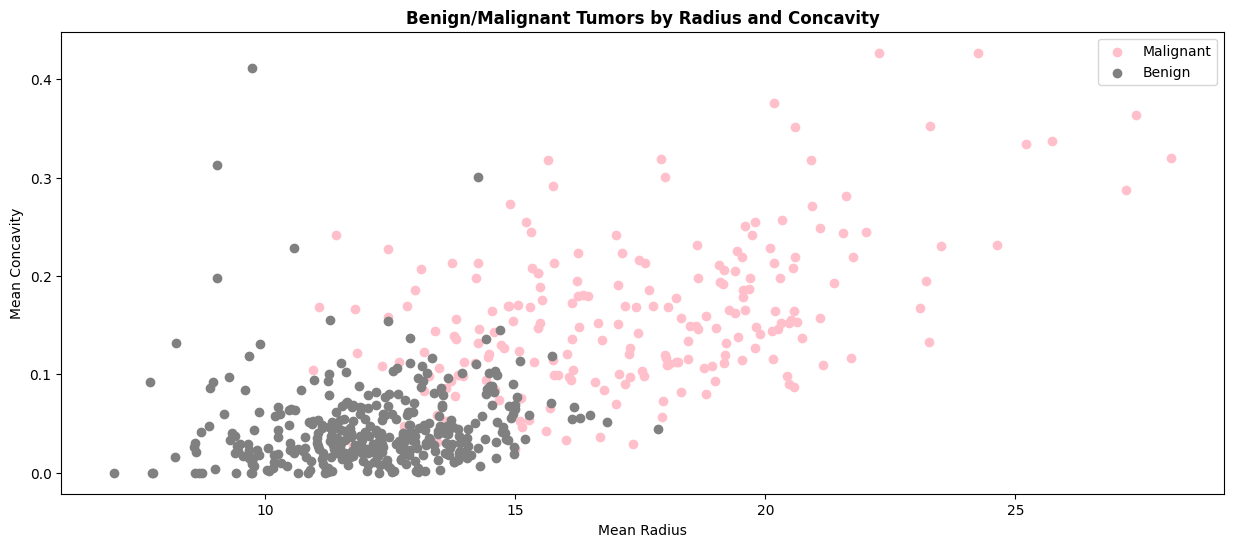

In [7]:
# Plotting mean radius and concavity, color-coded by target
colors = {0: 'pink', 1: 'gray'}

plt.figure(figsize = (15, 6))
for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    plt.scatter(cancer_features[mask, 0], cancer_features[mask, 6], label = target, color = colors[target])
    
plt.legend(['Malignant', 'Benign'])
plt.title("Benign/Malignant Tumors by Radius and Concavity", fontweight = 'bold')
plt.xlabel("Mean Radius")
plt.ylabel("Mean Concavity")

plt.show()

The distribution of tumor type seems to fall into two clusters. Benign tumors have a lower mean radius and mean concavity, while malignant tumors have a greater mean radius and mean concavity. The data is not entirely linearly separable, as significant overlap exists between the two conditions. However, the overall distribution and the apparent presence of visible clusters suggests that it will be a useful task for evaluating the custom logistic regression algorithm.

### Logistic Regression Implementation (2 Features)
*Classification using logistic regression with two features*

This section implements the custom logistic regression class to classify tumor type based on mean radius and concavity. It carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the logistic regression model, we normalize the feature data using z-scores for each feature, calculated using the `preprocess` package. This reduces the possibility that the relative scale of the feature will impact model results, and is standard practice in supervised learning. Feature normalization rescales each feature to prevent skewing results based on feature magnitude, ensuring that no one feature will overly contribute to model predictions.

In [8]:
# Standardizing the data
cancer_data_normal = z_score_standardize(cancer_features[:, [0, 6]])
print(f"Standardized feature data (first five rows): \n {cancer_data_normal[0:5, :]}")

Standardized feature data (first five rows): 
 [[ 1.09706398  2.65287398]
 [ 1.82982061 -0.02384586]
 [ 1.57988811  1.36347845]
 [-0.76890929  1.91589718]
 [ 1.75029663  1.37101143]]


Once the data has been scaled, it is split into testing and training arrays. This ensures that the model is not trained and tested on the same set of data, allowing for unbiased evaluation of model performance and preventing overfitting. The data is split in a 70/30 proportion such that the training data is 70% of the total dataset, and the testing data 30%. There are 569 samples in the cleaned dataset, so the training array should have approximately 398 samples and the testing should have 171.

Because this is a classification problem where the classes may not be evenly represented within the data, stratification is used to split the testing and training sets. Stratification is a division method that first groups the data based on a given label, then randomly samples from each group to ensure that they are proportionally represented in both the testing and training data. This method prevents significant bias arising from disproportionate class counts by preserving relative distributions and ensuring that each class is represented in the training data. In this case, the stratification method is based on the target (*target*), which should guarantee that samples from each tumor type are present in each set.

In [9]:
# Splitting the data into training and testing arrays
train_array, test_array, train_targets, test_targets = train_test(cancer_data_normal, cancer_status, stratify = cancer_status, random_state = 438)

# Verifying sizes of each array
print(f"Shape of training array: {train_array.shape}")
print(f"Shape of training targets: {train_targets.shape}")
print(f"Shape of testing array: {test_array.shape}")
print(f"Shape of testing targets: {test_targets.shape}")

Shape of training array: (398, 2)
Shape of training targets: (398,)
Shape of testing array: (171, 2)
Shape of testing targets: (171,)


We now perform classification using logistic regression by creating an instance of the `logistic_regression` class from the supervised learning package, and fitting it on the training data. The previously unseen test data is then provided to the fitted model to predict the tumor type labels. 

This logistic regression algorithm has the following specifications:
- **Epochs:** 1000
- **Learning Rate:** 0.01
- **Threshold:** 0.5

In [10]:
# Fitting the model
reg = logistic_regression()
reg.fit(train_array, train_targets)

# Predicting the benign/malignant status of testing data
prediction = reg.prediction(test_array)
probs = reg.predict_proba(test_array)

When the model has been successfully fitted and returns the tumor type predictions for the test data, we evaluate its performance using a variety of visualization and scoring methods. These include plotting the predictions, displaying the overall confusion matrix, and calculating accuracy, precision, recall, F1, and ROC AUC scores for each class, as well as plotting the binary cross-entropy loss over epochs. For a description of these metrics, see this [README](README.md).

The plot below is a visualization of logistic regression accuracy on the test data. The leftmost subplot displays the overall distribution of tumor radius and concavity, color-coded for tumor type; pale points are all data, and darker points indicate the gold-standard target labels for the test dataset. The rightmost subplot displays the same data, but with points that have been incorrectly classified by the logistic regression in yellow.

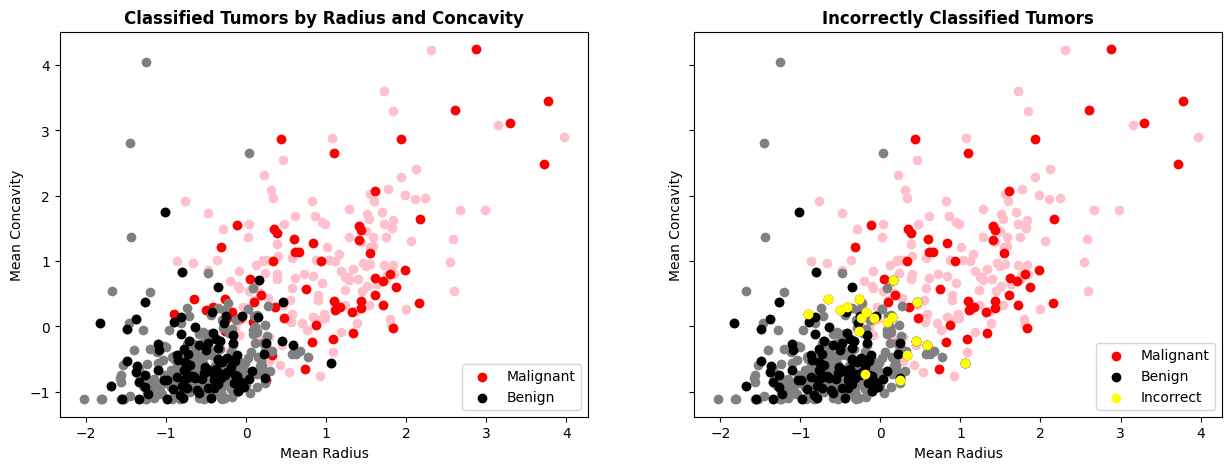

In [11]:
# Plotting mean radius and concavity for correct and predicted values, color-coded by target
colors = {0: 'pink', 1: 'gray'}
colors_2 = {0: 'red', 1: 'black'}

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    ax[0].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    ax[1].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    mask_new = (test_targets == target)
    ax[0].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])
    ax[1].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])

mask_incorrect = (test_targets != prediction)
ax[1].scatter(test_array[mask_incorrect, 0], test_array[mask_incorrect, 1], label = target, color = 'yellow')

ax[0].set_title("Classified Tumors by Radius and Concavity", fontweight = 'bold')
ax[1].set_title("Incorrectly Classified Tumors", fontweight = 'bold')

for i in range(2):
    ax[i].set_xlabel("Mean Radius")
    ax[i].set_ylabel("Mean Concavity")

handles, labels = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in [1, 3]]
selected_handles_2 = [handles[i] for i in [1, 3, 4]]
ax[0].legend(handles = selected_handles, labels = ['Malignant', 'Benign'])
ax[1].legend(handles = selected_handles_2, labels = ['Malignant', 'Benign', 'Incorrect'])

plt.show()

The custom logistic regression has acceptable accuracy for tumor type classification, although it misclassifies several points that occur in the overlap between visible clusters. In general, however, it produces fairly accurate labels for the testing data. For a more quantitative evaluation of the model, we plot the confusion matrix for each class, and produce the numerical evaluation metrics (accuracy, recall, precision, F1 scores on the micro and macro scale, and AUC), as well as plotting the loss history.

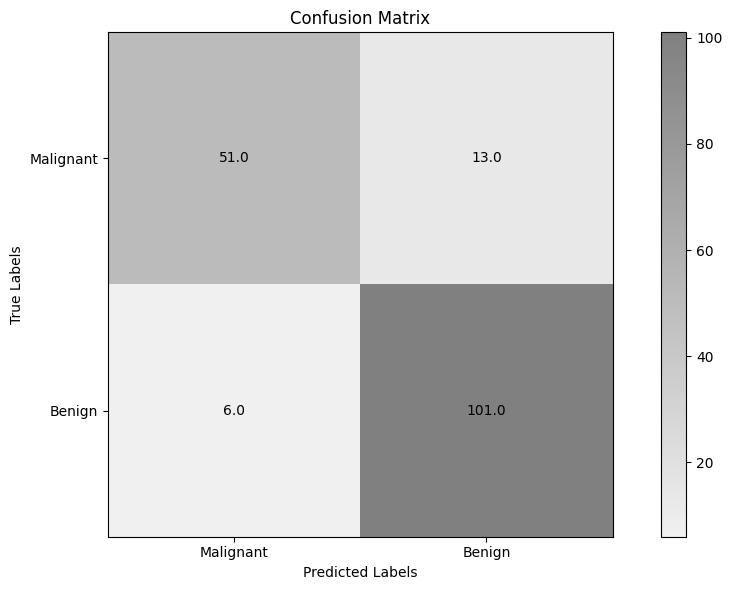

In [12]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(prediction, test_targets, conf_matrix_labels = ['Malignant', 'Benign'])

In [13]:
# Evaluating model performance on various metrics
print_model_metrics(prediction, test_targets)
print(f"AUC: {roc_auc(probs, test_targets):.2f}")

Model Metrics 
------------- 
Accuracy: 0.89 
Precision (Micro): 0.89 
Precision (Macro): 0.89 
Recall (Micro): 0.89 
Recall (Macro): 0.87 
F1 (Micro): 0.89 
F1 (Macro): 0.88
AUC: 0.96


The results of the quantitative metrics demonstrate that this logistic regression successfully classifies tumor type based on the two input features. It has an accuracy of around 89%, with similar precision, recall, and F1; the micro and macro scores for the latter three are similar to one another, suggesting that the model performs well for both classes. The AUC score is close to 1, supporting the ability of the model to distinguish between the two classes. Finally, the confusion matrix indicates that most tumors were classified correctly, with slightly poorer performance for the minority *malignant* class.

We can plot the loss history of the logistic regression over iterations to observe whether the model is learning appropriately.

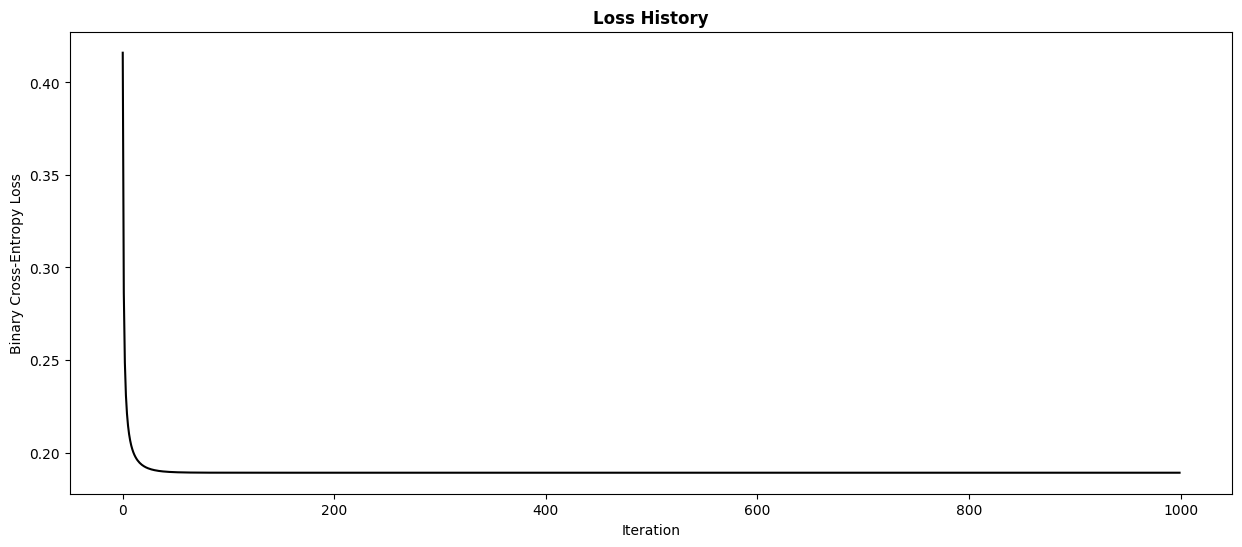

In [14]:
# Plotting the loss history
loss = reg.loss_
iteration = np.arange(len(loss))
plt.figure(figsize = (15, 6))
plt.plot(iteration, loss, 'black')
plt.title("Loss History", fontweight = 'bold')
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

The loss history for the logistic regression decreases smoothly as the iterations continue, beginning with a high value but dropping rapidly within 50 iterations. It begins to level off at around 50 to 100 epochs, where it no longer benefits from additional iterations. This indicates that the model is successfully learning based on the training data, as expected for logistic regression.

### Logistic Regression Implementation (Changing Parameters)
*Altering number of epochs and learning rate*

This section implements the custom logistic regression algorithm for classifying tumor type based on mean radius and mean concavity, but systematically changes a parameter in the model to determine the effects on performance. It first evaluates the model for different maximum epochs, using accuracy as the primary metric.

In [15]:
# Arrays for maximum epochs and accuracy
epoch_values = np.arange(1, 1050, 50)
accuracy_values_epochs = np.full(len(epoch_values), np.nan)

# Fitting and scoring the model for each set of epochs
for i in range(len(epoch_values)):
    reg = logistic_regression(epochs = int(epoch_values[i]))
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    accuracy = accuracy_score(prediction, test_targets)
    accuracy_values_epochs[i] = accuracy

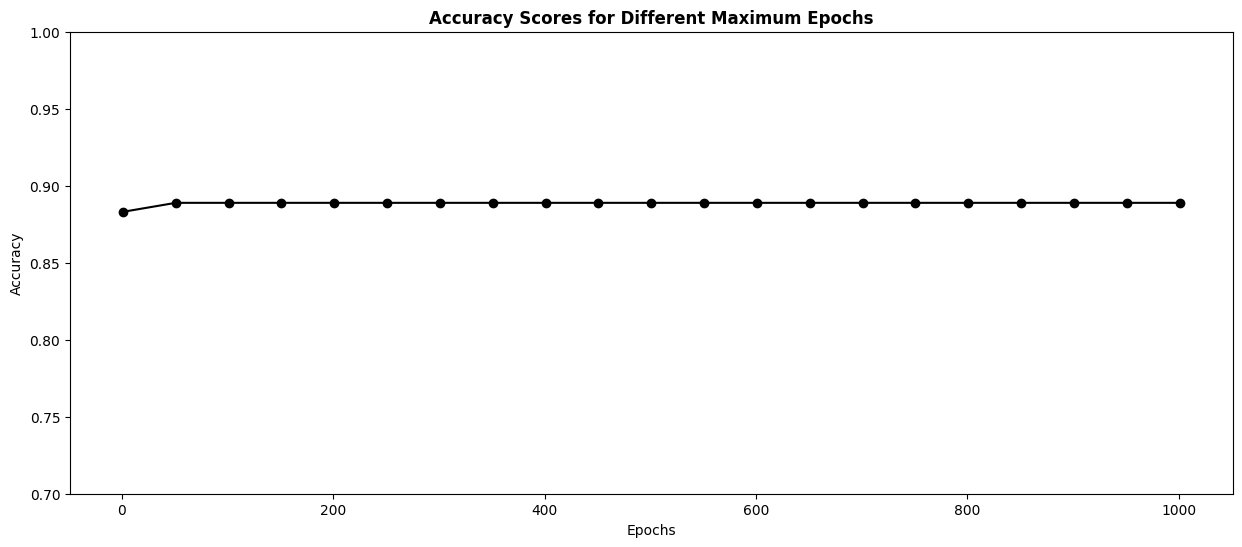

In [16]:
# Plotting the change in accuracy across different maximum epochs
plt.figure(figsize = (15, 6))
plt.plot(epoch_values, accuracy_values_epochs, 'black')
plt.scatter(epoch_values, accuracy_values_epochs, color = 'black')
plt.title("Accuracy Scores for Different Maximum Epochs", fontweight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()

For this set of data, the accuracy of the model is lower for very few epochs (1 - 50), and increases slightly up to approximately 75 - 100 epochs. As the count increases beyond this, the accuracy remains constant, indicating that the model does not require a significant number of epochs for successful performance. Given this data, we will use 100 epochs for the remainder of this analysis.

We now determine the effects of changing learning rate on the accuracy of the model.

In [17]:
# Arrays for learning rate and accuracy
learning_rate_values = np.linspace(0.001, 0.50, 20)
accuracy_values_learning_rate = np.full(len(learning_rate_values), np.nan)

# Fitting and scoring the model for each learning rate
for i in range(len(learning_rate_values)):
    reg = logistic_regression(epochs = 100, learning_rate = learning_rate_values[i])
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    accuracy = accuracy_score(prediction, test_targets)
    accuracy_values_learning_rate[i] = accuracy

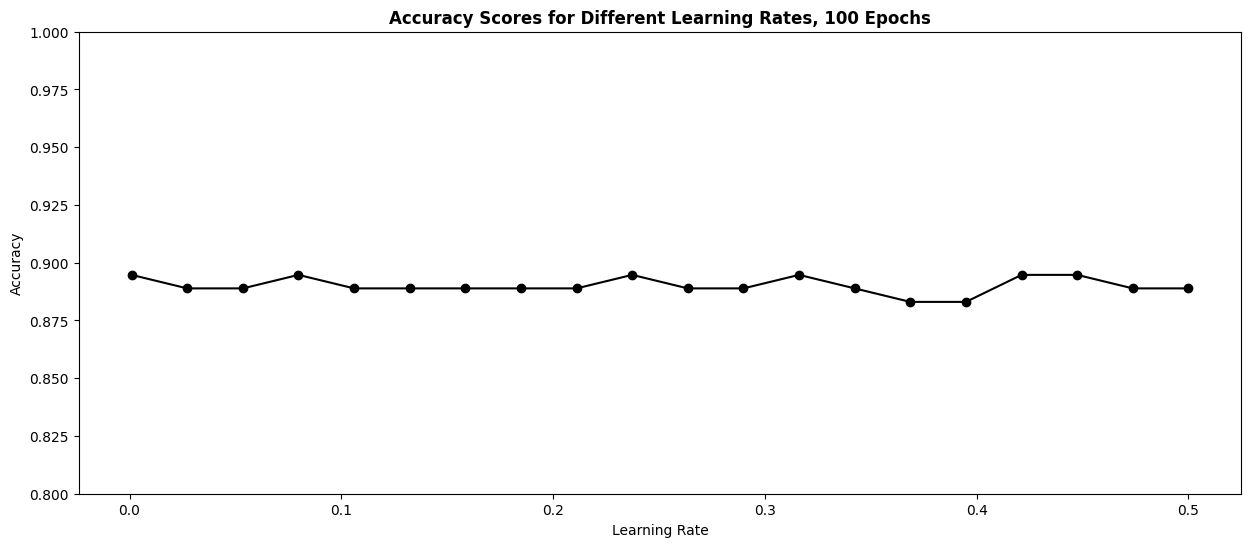

In [18]:
# Plotting the change in accuracy across different learning rates
plt.figure(figsize = (15, 6))
plt.plot(learning_rate_values, accuracy_values_learning_rate, 'black')
plt.scatter(learning_rate_values, accuracy_values_learning_rate, color = 'black')
plt.title("Accuracy Scores for Different Learning Rates, 100 Epochs", fontweight = 'bold')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.show()

For 100 epochs, the accuracy of the model changes slightly based on learning rate. At a low learning rate (0.01 - 0.3), the accuracy remains fairly constant. However, as the learning rate increases beyond this, the accuracy drops, with sporadic increases at certain values but an overall decreasing trend. This suggests that a lower learning rate is more appropriate for this model, and we select 0.01 as the learning rate in future analysis.

### Logistic Regression Implementation (Multiple Features)
*Classification using logistic regression with multiple (nine) features*

This section implements the custom logistic regression class to classify tumor type based on the first nine additional numeric features. As before, it carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the logistic regression model, we normalize the feature data using z-scores for each feature, again calculated using the `preprocess` package. In this case, the first nine features of the data set are normalized and used in the analysis. The data is then split into training (70%) and testing arrays (30%) with the stratification method based on tumor type label. Finally, a new instance of the logistic regression class is created and fit with the training data, then used to classify samples in the testing data.

This logistic regression algorithm has the following specifications:
- **Epochs:** 100
- **Learning Rate:** 0.01
- **Threshold:** 0.5

In [19]:
# Standardizing the data
cancer_data_normal_mult = z_score_standardize(cancer_features[:, 0:9])
print(f"Standardized feature data (first five rows, first five features): \n {cancer_data_normal_mult[0:5, 0:5]}")

Standardized feature data (first five rows, first five features): 
 [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [20]:
# Splitting the data into training and testing arrays
train_array_mult, test_array_mult, train_targets_mult, test_targets_mult = train_test(cancer_data_normal_mult, cancer_status, stratify = cancer_status, random_state = 438)

# Verifying sizes of each array
print(f"Shape of training array: {train_array_mult.shape}")
print(f"Shape of training targets: {train_targets_mult.shape}")
print(f"Shape of testing array: {test_array_mult.shape}")
print(f"Shape of testing targets: {test_targets_mult.shape}")

Shape of training array: (398, 9)
Shape of training targets: (398,)
Shape of testing array: (171, 9)
Shape of testing targets: (171,)


In [21]:
# Fitting the model
reg_mult = logistic_regression(epochs = 100)
reg_mult.fit(train_array_mult, train_targets_mult)

# Predicting tumor type based on testing data
prediction_mult = reg_mult.prediction(test_array_mult)
probs_mult = reg_mult.predict_proba(test_array_mult)

Because the model takes in nine features, there is no way to easily visualize the resulting classifications, as was possible with two features. Instead, model evaluation is done only using the confusion matrix and various performance metrics, as well as a loss history plot.

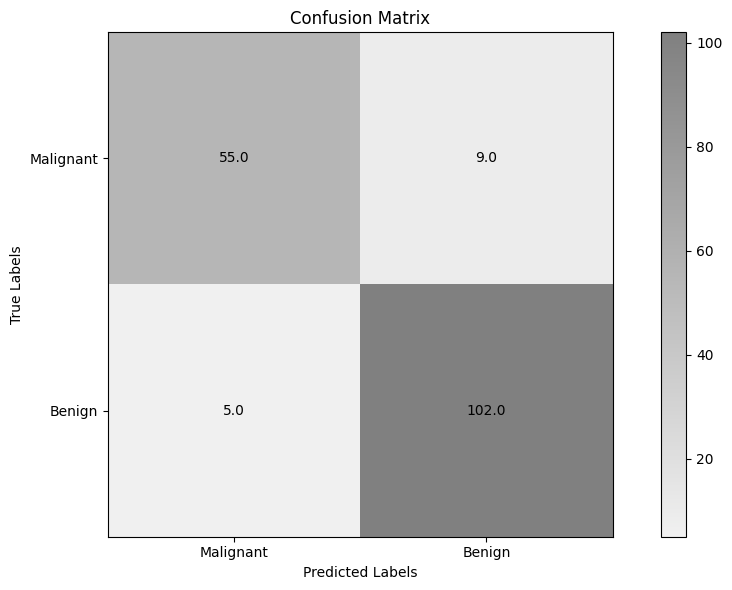

In [22]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(prediction_mult, test_targets_mult, conf_matrix_labels = ['Malignant', 'Benign'])

In [23]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_mult, test_targets_mult)
print(f"AUC: {roc_auc(probs_mult, test_targets_mult):.2f}")

Model Metrics 
------------- 
Accuracy: 0.92 
Precision (Micro): 0.92 
Precision (Macro): 0.92 
Recall (Micro): 0.92 
Recall (Macro): 0.91 
F1 (Micro): 0.92 
F1 (Macro): 0.91
AUC: 0.98


This model performs well in classifying tumor type based on the additional features, with an accuracy of approximately 92% and similar precision, recall, and F1 scores. The AUC score is 0.98, which indicates good ability to distinguish between classes. This is slightly better than the results from the model with only two features, indicating that the addition of features has a beneficial effect on this logistic regression algorithm. 

We can plot the loss history for this logistic regression.

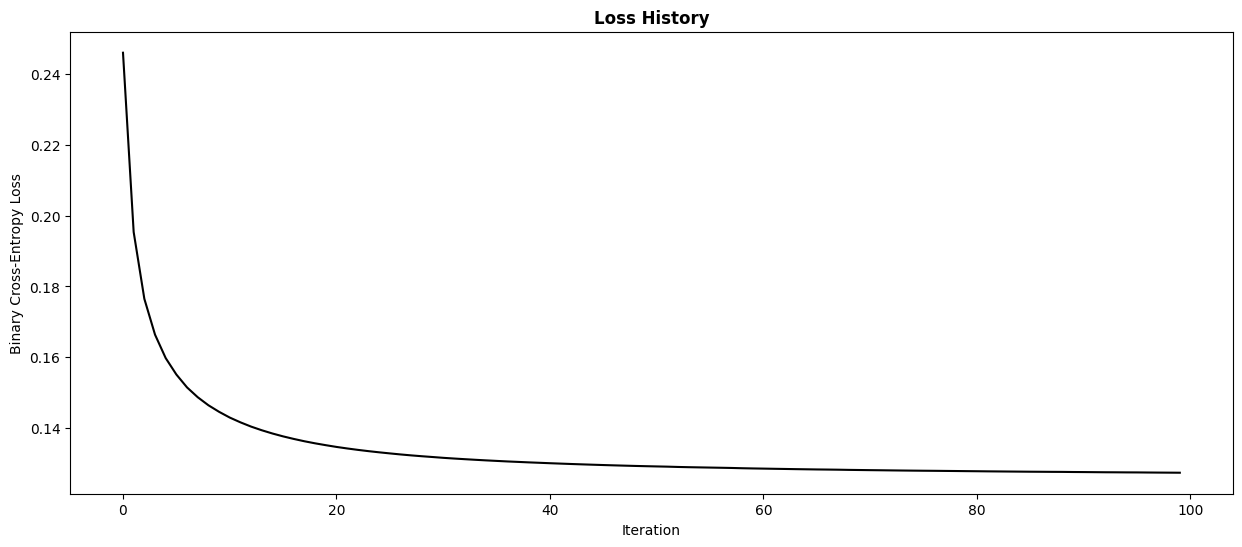

In [24]:
# Plotting the loss history
loss = reg_mult.loss_
iteration = np.arange(len(loss))
plt.figure(figsize = (15, 6))
plt.plot(iteration, loss, 'black')
plt.title("Loss History", fontweight = 'bold')
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

The loss history is typical for a functioning logistic regression model. The binary cross-entropy loss begins at a high value, then rapidly decreases as the model updates. At around 20 to 40 iterations, the loss begins to level out, and does not significantly improve with additional iterations. Overall, this validates the use of the custom logistic regression for this multi-feature classification problem; it is behaving as would be expected for this algorithm.

### Comparison with Existing Models
*Comparison with scikit-learn logistic regression*

In order to ensure that the custom-built logistic regression model is functioning as intended and providing expected results, it is useful to compare its performance to a logistic regression from established code. In this section, we rerun the analysis with all features using the scikit-learn logistic regression with a matching number of maximum iterations (1000) to verify the results of the custom logistic regression.

In [25]:
from sklearn.linear_model import LogisticRegression
reg_sk = LogisticRegression(max_iter = 100)
reg_sk.fit(train_array_mult, train_targets_mult)
prediction_sk = reg_sk.predict(test_array_mult)
probs_sk = reg_sk.predict_proba(test_array_mult)

In [26]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_sk, test_targets_mult)
print(f"AUC: {roc_auc(probs_sk[:, 1], test_targets_mult):.2f}")

Model Metrics 
------------- 
Accuracy: 0.92 
Precision (Micro): 0.92 
Precision (Macro): 0.93 
Recall (Micro): 0.92 
Recall (Macro): 0.91 
F1 (Micro): 0.92 
F1 (Macro): 0.92
AUC: 0.98


The scikit-learn logistic regression has an accuracy, precision, recall, and F1 score that is highly similar to that of the custom-built logistic regression model. There is no significant discrepancy between the two that would indicate a malfunction or incorrect implementation of the custom logistic regression. Therefore, the custom `rice_ml` logistic regression is able to handle multi-feature classification problems with a success equivalent to a professional level.